# Project 2 Regression Challenge
## Daniel Rossetti

# 0 - Problem Statement:

This is report is written from the standpoint of a data science consultant who has been hired by Zillow to prototype a home sale price estimator that can be used by website users to estimate the value of their home.  Home sale data from Ames, Iowa have been provided as a starter set and include information on almost 80 different attributes of the home or the sale itself.  This data will be used to train a linear regression model which will use a subset of these attributes to predict a home sale price.  The model quality will be evaluated against the mean average error of the predictions on the training dataset selected.  The target error is to be within $30,000 of the actual home price on average.  If successful, the methods used to create this prototype model will be employed to predict home values in other areas of the country to understand it's general applicability with the ultimate goal of being rolled out onto the Zillow website for users.

If time allows, this model will also examine the effect of time, indicating a shift in greater housing market trends, on the model.

## <font color = 'red'>Notes:
* <font color = 'red'>Go back and check the metric if it should be mean average percent error or mean average error



# 1 - Import Libraries and Read Data

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 1.1 - Read Data, Check for Null Values, Check Dataframe Integrity

In [23]:
# Read Training Data
train = pd.read_csv('../datasets/train.csv')

# Retrieve the shape of the dataset to evaluate size
print(train.shape)

train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [24]:
# Read Test Data
test = pd.read_csv('../datasets/test.csv')

# Retrieve the shape of the dataset to evaluate size
print(test.shape)
test.head()

(878, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [49]:
# There are about 80 columns, make a dataframe so we can filter only those columns with no null values

# Create a dataframe from the summed isnull() results for the train and test data
train_nulls = pd.DataFrame(train.isnull().sum())
test_nulls = pd.DataFrame(test.isnull().sum())

# Bring these dataframes together into a new dataframe
nulls = pd.DataFrame()
nulls['train'], nulls['test'] = train_nulls, test_nulls        

# Make percent columns so it's easier to decipher impact on dataset
nulls['train_pcnt'], nulls['test_pcnt'] = nulls['train'] / train.shape[0] * 100, nulls['test'] / test.shape[0] * 100

# Filter the dataframe to show only the columns in each with null values
nulls[(nulls['train'] != 0) | (nulls['test'] != 0)].sort_values('train', ascending = False)

,train,test,train_pcnt,test_pcnt
Pool QC,2042,874.0,99.561190,99.544419
Misc Feature,1986,837.0,96.830814,95.330296
Alley,1911,820.0,93.174061,93.394077
Fence,1651,706.0,80.497318,80.410023
Fireplace Qu,1000,422.0,48.756704,48.063781
Lot Frontage,330,160.0,16.089712,18.223235
Garage Finish,114,45.0,5.558264,5.125285
Garage Qual,114,45.0,5.558264,5.125285
Garage Cond,114,45.0,5.558264,5.125285
Garage Yr Blt,114,45.0,5.558264,5.125285


Some catageories are substantially under-populated and should be removed.  Those with null counts exceeding 10% of the data, will be eliminated (dropped).  Smaller amounts of null values in each dataframe may be acceptable depending on which featuers are chosen for the selected model(s).  They will be dropped later if needed.

The above dataframe can be filtered to yield the columns that need to be removed.

In [56]:
# Filter the "nulls" dataframe on the 10% criteria
drop_nulls = nulls[(nulls['train_pcnt'] >= 10) | (nulls['test_pcnt'] >= 10)].sort_values('train', ascending = False)

# Make a variable which is a list (index's are their own objects) of the columns matching the above criteria.
drop_cols = list(drop_nulls.index)
drop_cols

['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Lot Frontage']

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [37]:
train.corr().shape

(39, 39)

<AxesSubplot:>

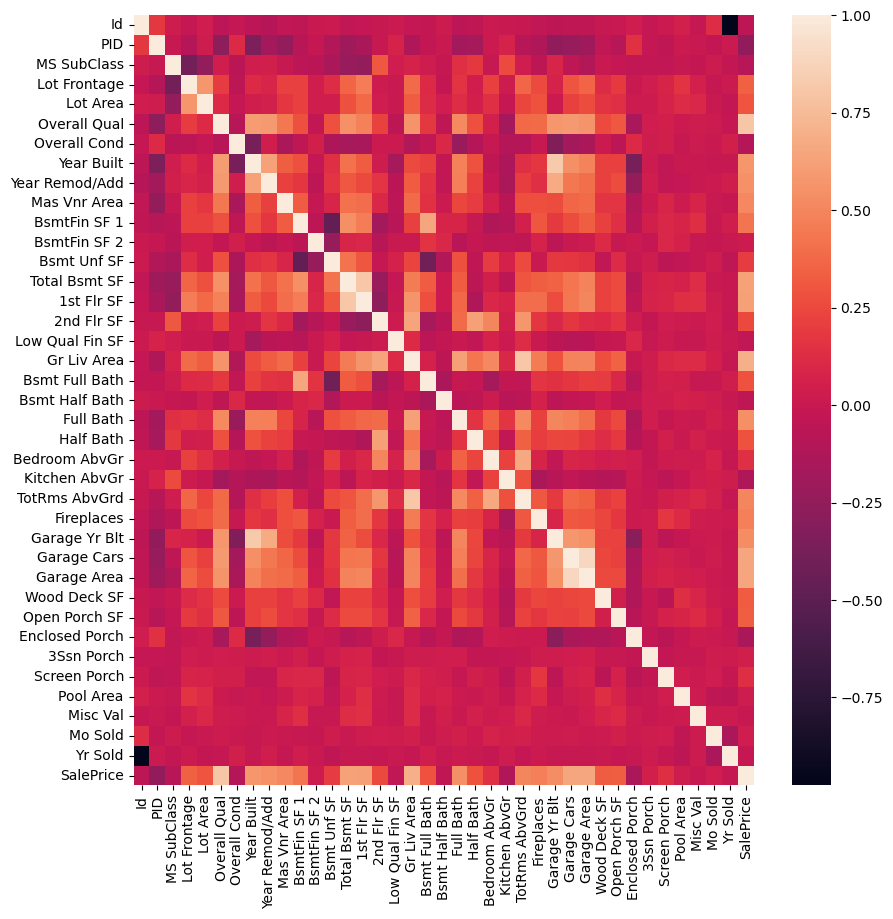

In [38]:

plt.figure(figsize=(10, 10))
sns.heatmap(train.corr())

In [9]:
# View a list of the columns to refer back to for proper spelling while coding
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
train['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [ ]:
test.shape

,train,test
Lot Frontage,330,160.0
Alley,1911,820.0
Mas Vnr Type,22,1.0
Mas Vnr Area,22,1.0
Bsmt Qual,55,25.0
Bsmt Cond,55,25.0
Bsmt Exposure,58,25.0
BsmtFin Type 1,55,25.0
BsmtFin SF 1,1,0.0
BsmtFin Type 2,56,25.0
